<a href="https://colab.research.google.com/github/AkhileshMauryaa/Python_Machine_learning/blob/main/Health_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/Health_insurance_cost.xlsx")
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,age,BMI,Children,health_insurance_price
count,1309.000000,1314.000000,1337.000000,1335.000000
mean,39.181818,30.638253,1.095737,13277.238554
std,14.049681,6.112628,1.205571,12113.150034
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.205000,0.000000,4746.698450
50%,39.000000,30.305000,1.000000,9386.161300
75%,51.000000,34.580000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include='object')

,gender,smoking_status,location
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [ ]:
# i am filling missing values in columns
df['BMI'].fillna(df['BMI'].median(),inplace=True)

In [ ]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [ ]:
df['health_insurance_price'].fillna(df['health_insurance_price'].median(),inplace=True)

In [ ]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [ ]:
df.shape

(1337, 7)

# EDA

<Figure size 500x400 with 0 Axes>

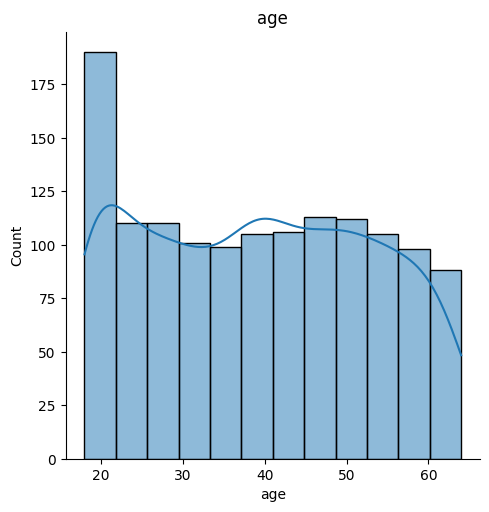

<Figure size 500x400 with 0 Axes>

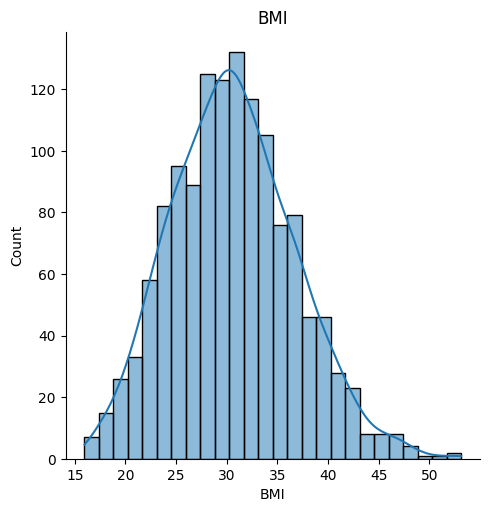

<Figure size 500x400 with 0 Axes>

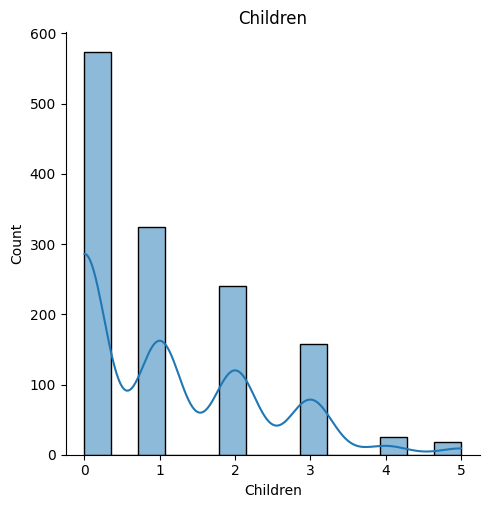

<Figure size 500x400 with 0 Axes>

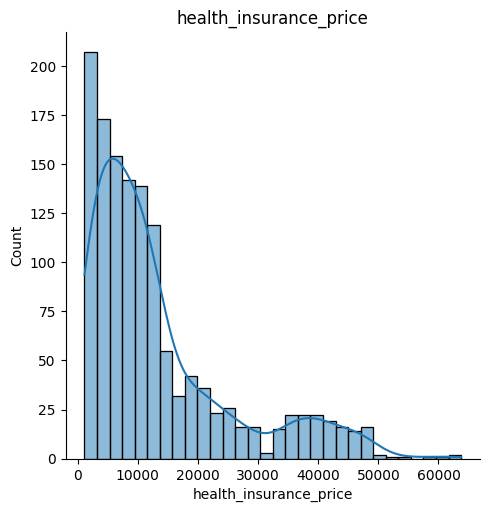

In [ ]:
for col in df.select_dtypes(include=('int','float')).columns:
  plt.figure(figsize=(5,4),)
  sns.displot(x=col,data=df,kde='True')
  plt.title(f"{col}")
  plt.show()

# insight:
1. highest age people 20 more then other people
2. BMI range 18 and 25



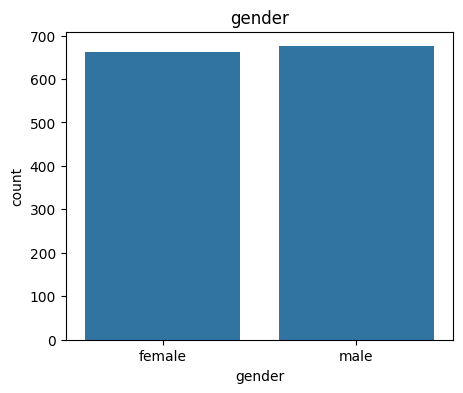

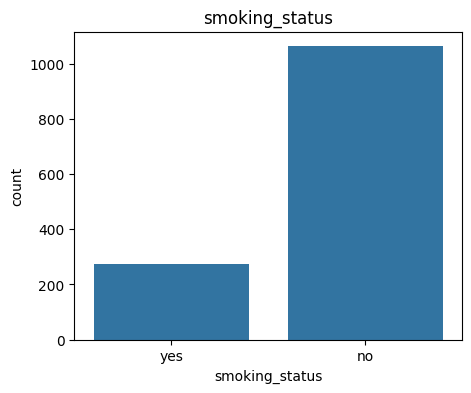

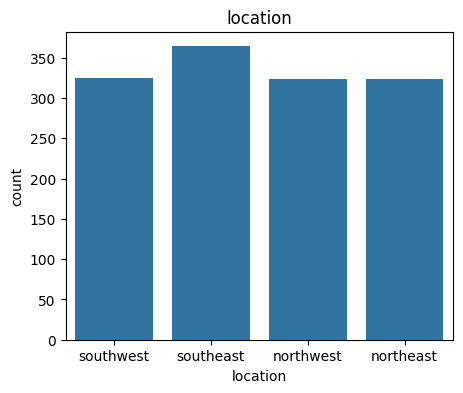

In [ ]:
for col in df.select_dtypes(include=('object')).columns:
  plt.figure(figsize=(5,4))
  sns.countplot(x=col,data=df)
  plt.title(f"{col}")
  plt.show()

# insight:
1. gender:- male > feamle
2. smoking:- most of people donot working smoke
3. location:- most peole belong southest regions

In [ ]:
df.head(1)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.924


In [ ]:
import plotly.express as px

fig=px.scatter(x=df['age'],y=df['health_insurance_price'],color=df['smoking_status'])
fig.update_layout(title='Age vs Health Insurance Price')
fig.show()

above we can see.when age growing then heath insurance price growing

In [ ]:

fig=px.scatter(x=df['BMI'],y=df['health_insurance_price'],color=df['smoking_status'])
fig.update_layout(title='BMI vs Health Insurance Price')
fig.show()

who bmi index 18-30 they are not much smoker.

<Axes: ylabel='health_insurance_price'>

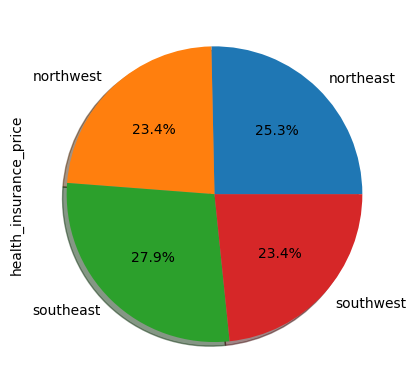

In [ ]:
df.groupby('location')['health_insurance_price'].mean().plot(kind='pie',autopct='%1.1f%%',shadow='true')

# outliers

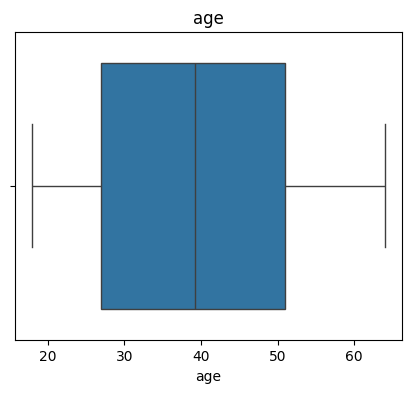

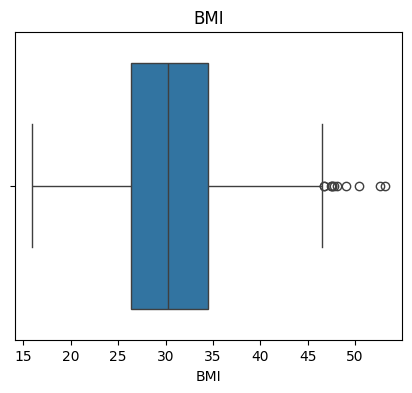

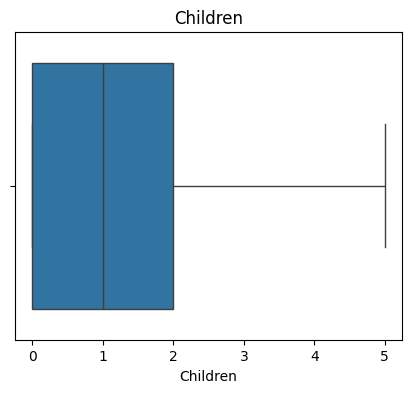

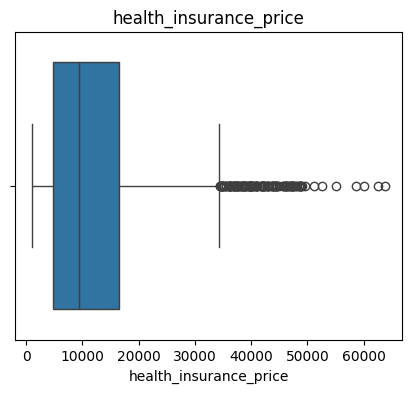

In [ ]:
for col in df.select_dtypes(include=('int','float')).columns:
  plt.figure(figsize=(5,4))
  sns.boxplot(x=col,data=df)
  plt.title(f"{col}")
  plt.show()

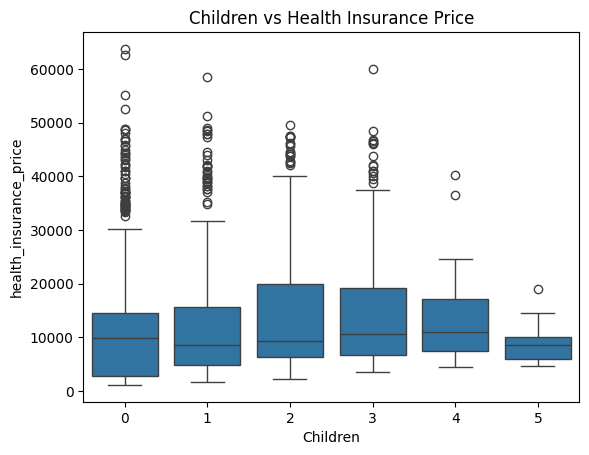

In [ ]:
sns.boxplot(x='Children', y='health_insurance_price', data=df)
plt.title('Children vs Health Insurance Price')
plt.show()

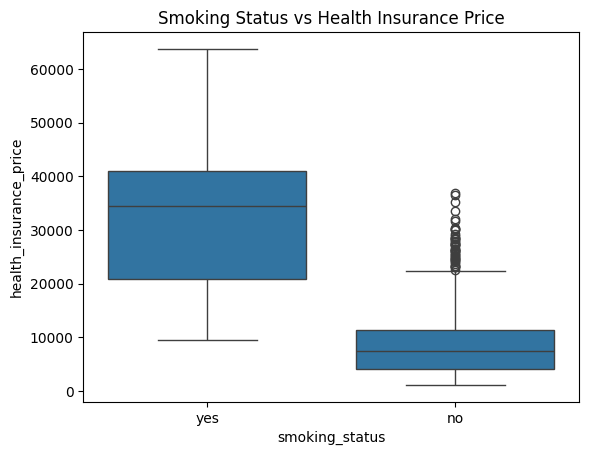

In [ ]:
sns.boxplot(x='smoking_status', y='health_insurance_price', data=df)
plt.title('Smoking Status vs Health Insurance Price')
plt.show()

In [ ]:
## lets remove outliers
df['health_insurance_price'].describe()

count     1337.000000
mean     13271.417945
std      12105.014743
min       1121.873900
25%       4747.052900
50%       9386.161300
75%      16586.497710
max      63770.428010
Name: health_insurance_price, dtype: float64

In [ ]:
q1 = df['health_insurance_price'].quantile(0.25)
q3 = df['health_insurance_price'].quantile(0.75)

print(q1,  q3)
iqr = q3-q1
print(iqr)

upper_bound = q3+(iqr*1.5)
print(upper_bound)

4747.0529 16586.49771
11839.44481
34345.664925000005


<Axes: ylabel='health_insurance_price'>

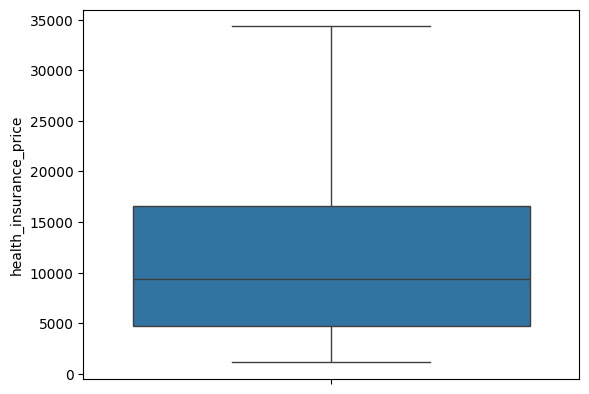

In [ ]:
df['health_insurance_price'] = np.where(df['health_insurance_price']>upper_bound,upper_bound,df['health_insurance_price'])
sns.boxplot(df['health_insurance_price'])

In [ ]:
df['BMI'].describe()

count    1337.000000
mean       30.632521
std         6.059939
min        15.960000
25%        26.315000
50%        30.305000
75%        34.430000
max        53.130000
Name: BMI, dtype: float64

In [ ]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)

print(q1,  q3)
iqr = q3-q1
print(iqr)

upper_bound = q3+(iqr*1.5)
print(upper_bound)

26.315 34.43
8.114999999999998
46.6025


<Axes: ylabel='BMI'>

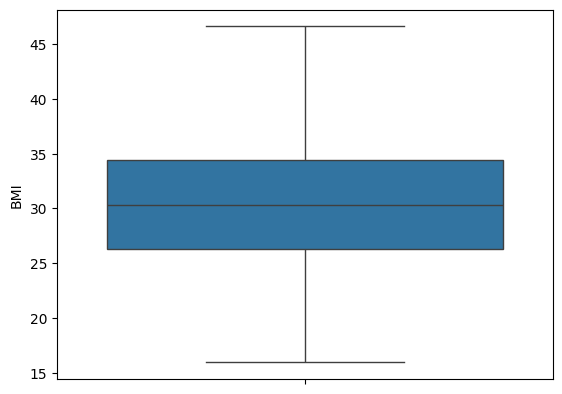

In [ ]:
df['BMI'] =  np.where(df['BMI']>upper_bound,upper_bound,df['BMI'])
sns.boxplot(df['BMI'])

# Feature Engineering

In [ ]:
df1 = df.copy()

In [ ]:
df1.head(1)

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.924


In [ ]:
df1 = pd.get_dummies(df1, columns=['location'],drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df1['gender'] = le.fit_transform(df1['gender'])

In [ ]:
df1['smoking_status'] = le.fit_transform(df1['smoking_status'])

In [ ]:
df1.head()

,age,gender,BMI,Children,smoking_status,health_insurance_price,location_northwest,location_southeast,location_southwest
0,19.0,0,30.305,0,1,16884.92400,0,0,1
1,18.0,1,33.770,1,0,1725.55230,0,1,0
2,28.0,1,33.000,3,0,4449.46200,0,1,0
3,33.0,1,22.705,0,0,21984.47061,1,0,0
4,32.0,1,28.880,0,0,3866.85520,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

# split data train and test

In [ ]:
x = df1.drop(['health_insurance_price'],axis=1)
y = df1['health_insurance_price']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
x.head(2)

,age,gender,BMI,Children,smoking_status,location_northwest,location_southeast,location_southwest
0,19.0,0,30.305,0,1,0,0,1
1,18.0,1,33.770,1,0,0,1,0


In [ ]:
y.head(2)

0    16884.9240
1     1725.5523
Name: health_insurance_price, dtype: float64

In [ ]:
sc = StandardScaler()
sc.fit_transform(x_train)

array([[-5.15536899e-01, -9.90069267e-01, -1.94828190e-01, ...,
        -5.70435645e-01,  1.65915912e+00, -5.78118533e-01],
       [ 1.56272244e+00, -9.90069267e-01, -1.44847584e+00, ...,
        -5.70435645e-01, -6.02714946e-01, -5.78118533e-01],
       [-1.44717040e+00,  1.01003034e+00, -1.02339796e+00, ...,
        -5.70435645e-01, -6.02714946e-01,  1.72974908e+00],
       ...,
       [-8.58252877e-04,  1.01003034e+00,  1.08372637e+00, ...,
        -5.70435645e-01,  1.65915912e+00, -5.78118533e-01],
       [-1.44717040e+00,  1.01003034e+00,  7.91485328e-01, ...,
         1.75304613e+00, -6.02714946e-01, -5.78118533e-01],
       [ 9.89409521e-01,  1.01003034e+00, -7.22854619e-01, ...,
        -5.70435645e-01, -6.02714946e-01, -5.78118533e-01]])

In [ ]:
sc.transform(x_test)

array([[-8.58252877e-04, -9.90069267e-01,  1.50382287e+00, ...,
        -5.70435645e-01,  1.65915912e+00, -5.78118533e-01],
       [ 5.59424830e-01, -9.90069267e-01, -2.31358320e-01, ...,
        -5.70435645e-01,  1.65915912e+00, -5.78118533e-01],
       [ 7.02753060e-01,  1.01003034e+00,  9.74128522e-02, ...,
        -5.70435645e-01, -6.02714946e-01, -5.78118533e-01],
       ...,
       [ 8.46081291e-01,  1.01003034e+00, -1.21767930e-01, ...,
        -5.70435645e-01,  1.65915912e+00, -5.78118533e-01],
       [ 9.89409521e-01,  1.01003034e+00, -1.63776834e+00, ...,
        -5.70435645e-01,  1.65915912e+00, -5.78118533e-01],
       [ 1.77771479e+00,  1.01003034e+00,  1.23316781e+00, ...,
        -5.70435645e-01, -6.02714946e-01, -5.78118533e-01]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7491730107771872

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr_pred = lr.predict(x_test)
score = r2_score(y_test, lr_pred)
mse = mean_squared_error(y_test,lr_pred)
mbe = mean_absolute_error(y_test,lr_pred)
print(f"r2 score:,{score}")
print(f"mean squre error:,{mse}")
print(f"mean absolute error:,{mbe}")

r2 score:,0.7088886882878435
mean squre error:,32007588.665944017
mean absolute error:,3637.8232763477176


# random forest regressor

In [ ]:
rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9673374636703679

In [ ]:
rf_pred = rf.predict(x_test)
score_rf = r2_score(y_test, rf_pred)
print(f"r2 score:,{score_rf}")

r2 score:,0.7568752071245057


# Hyperparameter Tuning

In [ ]:
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[None,10,20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_serch = GridSearchCV(rf,param_grid=param_grid,cv=5,scoring='r2')

grid_serch.fit(x_train, y_train)

best_params = grid_serch.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9673374636703679

In [ ]:
rf_pred = rf.predict(x_test)
score_rf = r2_score(y_test, rf_pred)
print(f"r2 score:,{score_rf}")

r2 score:,0.7568752071245057


In [ ]:
input_data = [19, 1, 30.30, 0, 1, 0,0,1]

# Convert input_data to a numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Make a prediction using the model
prediction = lr.predict(input_data_reshaped)

# Print the prediction
print('The predicted health insurance price is USD ', prediction[0])

The predicted health insurance price is USD  22939.5607816774


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

